In [1]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ['/public/home/mowp/test/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
import pyBigWig
import numpy as np
import pandas as pd
import math

In [3]:
import sys
%load_ext autoreload
%autoreload 1

sys.path.append('/public1/mowp/workspace/nanopore_modification/scripts')
%aimport utils

In [4]:
chromsize = '/data/Zhaijx/mowp/db/col-CEN/dna/Col-CEN_v1.2.size'
chromsize_dict = {}
with open(chromsize, 'r') as f:
    for line in f:
        line = line.rstrip().split('\t')
        chromsize_dict[line[0]] = int(line[1])

In [11]:
def get_xrange(ranges, binsize, extend: int = 0):
    xranges = []
    for i in ranges:
        s = i[0] / binsize
        length = i[1] / binsize - s + extend / binsize
        xranges.append((s, length))
    return xranges

def set_ax(ax, show_yaxis=False, bottom=False, show_major_ticks=False):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    if not bottom:
        ax.spines["bottom"].set_visible(False)

    if not show_yaxis:
        ax.spines["left"].set_visible(False)
        ax.yaxis.set_major_locator(ticker.NullLocator())
    else:
        ax.tick_params(axis='y', which='major', labelsize=10)
    
    if not show_major_ticks:
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.xaxis.set_ticks_position("none")

In [13]:
infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/aligned_data/20221029_col_m6A.sorted.q2.bw'
binsize, stepsize = 100_000, 100_000
cov = utils.genome_wide_bigwig_within_bin(infile, chromsize, binsize=100_000, stepsize=100_000)

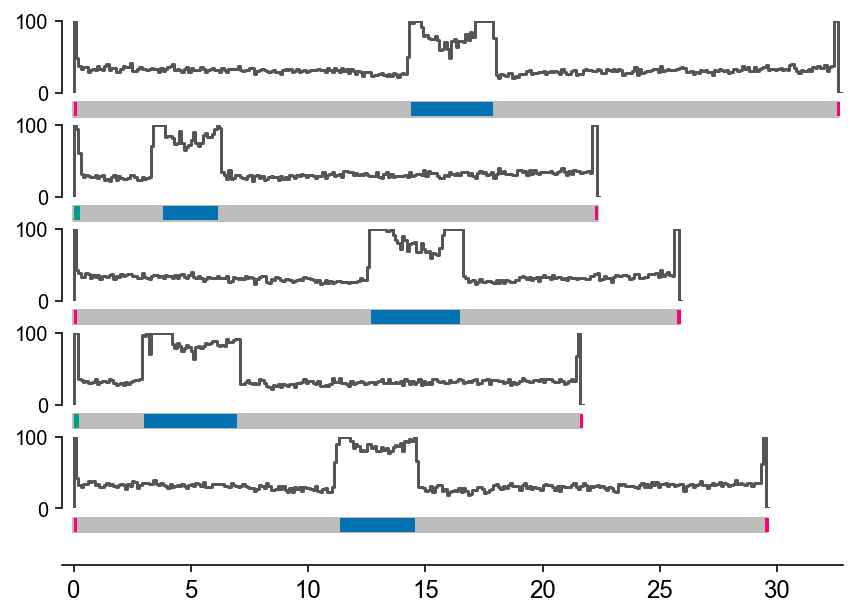

In [14]:
gridspec_kw = [3, .65]*len(cov) + [1]

fig, ax = plt.subplots(
    nrows=len(cov)*2+1, figsize=(7, 5), sharex=True,
    gridspec_kw={"height_ratios": gridspec_kw},)

for i, c in enumerate(cov):
    # coverage
    ax[i*2].step(np.arange(len(cov[c])+2), [0]+cov[c]+[0], color='#555555')
    ax[i*2].set_ylim(0, 100)
    set_ax(ax[i*2], show_yaxis=True, bottom=False)

    # chromosome
    xarange = [(0, math.ceil(chromsize_dict[c]/ stepsize))]
    ax[i*2+1].broken_barh(
        xarange, (0, 1), 
        facecolors='#bfbcbc', edgecolor='#bfbcbc', linewidth=2)
    
    # centromere
    xarange = get_xrange(cen_regions[c], stepsize)
    ax[i*2+1].broken_barh(
        xarange, (0, 1), 
        facecolors='#0471b1', edgecolor=None, linewidth=2)

    # telomere
    xarange = get_xrange(tel_regions[c], stepsize, extend=150_000)
    ax[i*2+1].broken_barh(
        xarange, (0, 1),
        facecolors='#ff0077', edgecolor=None, linewidth=2)

    # rDNA
    if c in rDNA_regions:
        xarange = get_xrange(rDNA_regions[c], stepsize, extend=150_000)
        ax[i*2+1].broken_barh(
            xarange, (0, 1),
            facecolors='#009d88', edgecolor=None, linewidth=2)
    
    set_ax(ax[i*2+1])

set_ax(ax[-1], bottom=True, show_major_ticks=True)
xticks = np.array([  0.,  50., 100., 150., 200., 250., 300.])
plt.xticks(xticks, (xticks/(1e6/stepsize)).astype(int))
plt.xlim(-5, 328);
